In [34]:
#Este documento sirve de ejemplo de uso de las funciones ToolBox del grupo california

In [35]:
# Importar toolbox
import ToolBox_Californiano as tb
import pandas as pd
import numpy as np

In [41]:
from importlib import reload
reload(tb)
dir(tb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clasifica_variables',
 'describe_df',
 'f_oneway',
 'get_features_cat_regression',
 'get_features_num_regression',
 'np',
 'pd',
 'pearsonr',
 'plot_features_cat_regression',
 'plot_features_num_regression',
 'plt',
 'sns']

In [37]:
#Importar dataframe
df = pd.read_csv('../data/dataset_viajes_jun23.csv')
df.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [38]:
tb.describe_df(df)

COL_N,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
DATA_TYPE,object,object,object,int64,object,bool,float64,int64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,11,11,45,4,2,501,113,600,347,1
CARDIN (%),0.01,0.02,0.02,0.08,0.01,0.0,0.84,0.19,1.0,0.58,0.0


In [43]:
tb.clasifica_variables(df,0.05,0.05)

,nombre_variable,tipo_sugerido
0,aircompany,Categórica
1,origen,Categórica
2,destino,Categórica
3,distancia,Numérica Continua
4,avion,Categórica
5,con_escala,Binaria
6,consumo_kg,Numérica Continua
7,duracion,Numérica Continua
8,ingresos,Numérica Continua
9,id_vuelo,Categórica


In [20]:
tb.get_features_num_regression(df,'duracion',0.05,0.05)

La correlacion entre las columnas numericas y el target debe superar: 0.05
---------------------------------------------------------------------------
<distancia> corr con target: 0.9859625296678585
<consumo_kg> corr con target: 0.6687065118640217
<ingresos> corr con target: 0.867514506911325

¿Es la correlacion estadisticamente significativa?
---------------------------------------------------------------------------
<distancia>: 0.0 Si
<consumo_kg>: 5.2789464214573984e-79 Si
<ingresos>: 1.626126699305076e-183 Si


['distancia', 'consumo_kg', 'ingresos']

Columna: distancia, p-value: 0.0
Columna: consumo_kg, p-value: 5.2789464214573984e-79
Columna: duracion, p-value: [0. 0.]
Columna: ingresos, p-value: 1.626126699305076e-183


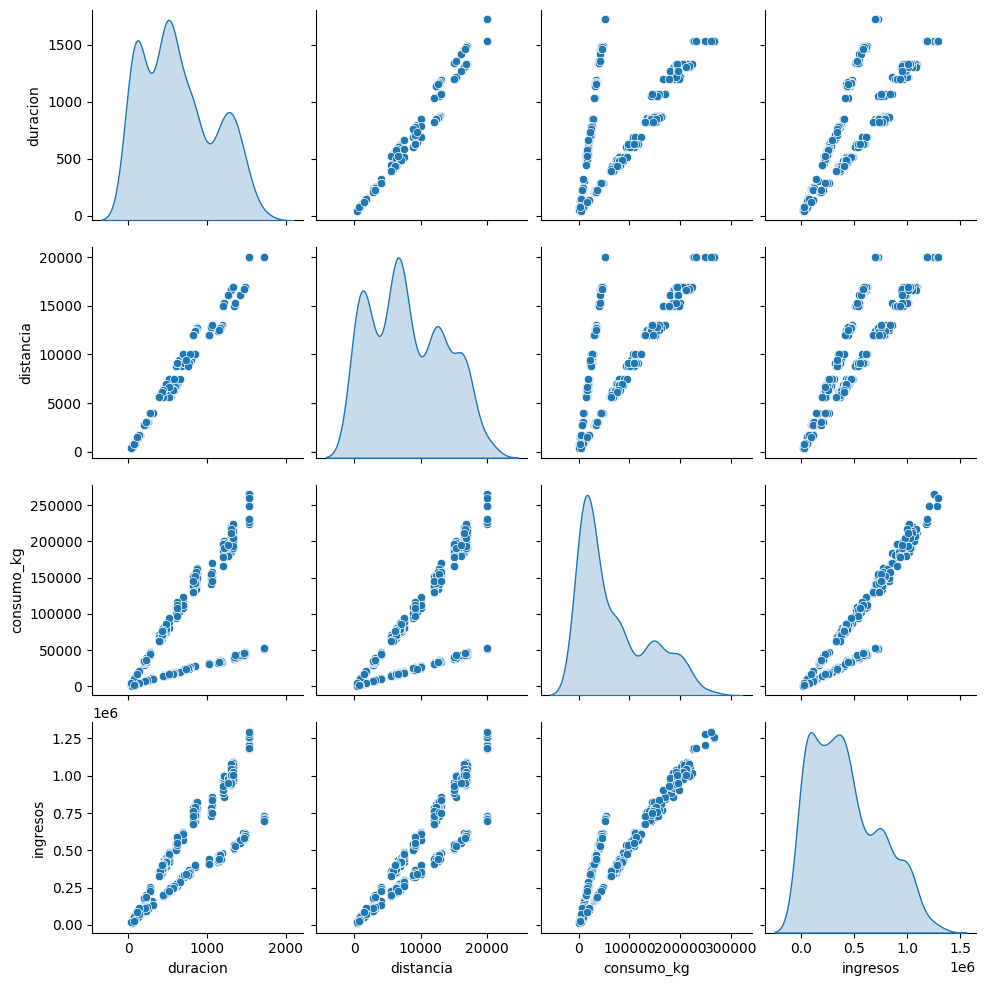

['distancia', 'consumo_kg', 'ingresos']

In [23]:
columns = df.select_dtypes(include=np.number).columns.tolist()

tb.plot_features_num_regression(df,'duracion',columns,   0.05,0.05)

In [44]:
tb.get_features_cat_regression(df,'duracion',0.05)

No se pudo evaluar la columna 'mes': At least two samples are required; got 1.


['aircompany', 'origen', 'destino', 'avion', 'id_vuelo']

In [45]:
columns = df.select_dtypes(object).columns.tolist()

tb.plot_features_cat_regression(df,'duracion')

No se pudo evaluar la columna 'mes': At least two samples are required; got 1.
No hay variables categóricas significativas


[]